In [ ]:
!PYTHONHASHSEED=0

In [ ]:
# Import TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.12.0'

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random as python_random

from tensorflow.keras import layers

In [ ]:
np.random.seed(0)
python_random.seed(0)
tf.random.set_seed(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import urllib.request
import tarfile

# Dataset URL
url = "http://download.tensorflow.org/example_images/flower_photos.tgz"

# download destination path
file_name = "flower_photos.tgz"

# file download
urllib.request.urlretrieve(url, file_name)

# file extraction
tar = tarfile.open(file_name)
tar.extractall()
tar.close()

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('flower_photos', output="output", seed=1337, ratio=(0.7, 0.2, 0.1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 3670 files [00:00, 4940.52 files/s]


In [ ]:
path_train='/content/output/train/'
path_val='/content/output/val/'
path_test='/content/output/test/'

In [ ]:
train_dataset = keras.preprocessing.image_dataset_from_directory(path_train,
                                                            image_size=(224, 224),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            validation_split = False,
                                                            shuffle=True,
                                                            seed=1)

Found 2567 files belonging to 5 classes.


In [ ]:
val_dataset = keras.preprocessing.image_dataset_from_directory(path_val,
                                                            image_size=(224, 224),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            validation_split = False,
                                                            shuffle=True,
                                                            seed=1)

Found 731 files belonging to 5 classes.


In [ ]:
test_dataset = keras.preprocessing.image_dataset_from_directory(path_test,
                                                            image_size=(224, 224),
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            validation_split = False,
                                                            shuffle=True,
                                                            seed=1)

Found 372 files belonging to 5 classes.


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
num_classes = 5

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

# model 1
- ottimizzatore rms

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))

x = inputs
x = data_augmentation(x)
x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(256, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net1 = keras.Model(inputs, outputs)

# Compile the model for training
net1.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy']
             )

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history1 = net1.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset,
          callbacks=[callback]);

Epoch 1/40
81/81 [==============================] - 36s 167ms/step - loss: 1.9009 - accuracy: 0.5099 - val_loss: 3.1681 - val_accuracy: 0.4172
Epoch 2/40
81/81 [==============================] - 10s 114ms/step - loss: 1.5946 - accuracy: 0.5945 - val_loss: 1.7667 - val_accuracy: 0.5321
Epoch 3/40
81/81 [==============================] - 8s 89ms/step - loss: 1.4216 - accuracy: 0.6397 - val_loss: 1.7593 - val_accuracy: 0.5445
Epoch 4/40
81/81 [==============================] - 9s 111ms/step - loss: 1.3112 - accuracy: 0.6677 - val_loss: 1.8259 - val_accuracy: 0.4610
Epoch 5/40
81/81 [==============================] - 9s 107ms/step - loss: 1.1930 - accuracy: 0.6802 - val_loss: 1.1332 - val_accuracy: 0.7018
Epoch 6/40
81/81 [==============================] - 8s 91ms/step - loss: 1.0931 - accuracy: 0.7137 - val_loss: 1.2753 - val_accuracy: 0.6279
Epoch 7/40
81/81 [==============================] - 10s 114ms/step - loss: 1.0548 - accuracy: 0.7203 - val_loss: 1.2392 - val_accuracy: 0.6347
Epoch

In [ ]:
net1.save('drive/MyDrive/FDL/net1.h5')

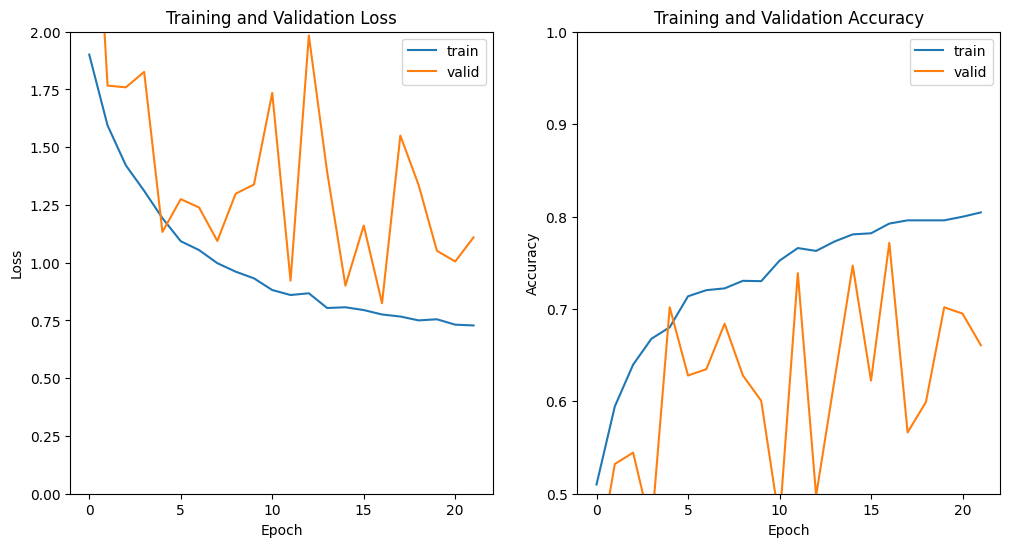

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

In [ ]:
loss, accuracy = net1.evaluate(test_dataset)

12/12 [==============================] - 1s 52ms/step - loss: 1.0862 - accuracy: 0.6801


In [ ]:
errate=0
for images, labels in test_dataset:
    for i in range( images.shape[0]):
        predictions = net1.predict(tf.expand_dims(images[i], 0), verbose=0, steps=1)
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          errate+=1
errate

119

# model 2
- ottimizzatore adam

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))

x = inputs
x = data_augmentation(x)
x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(256, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)

x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net2 = keras.Model(inputs, outputs)


from tensorflow.keras.optimizers import Adam

net2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history2 = net2.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset,
          callbacks=[callback]);

Epoch 1/40
81/81 [==============================] - 15s 118ms/step - loss: 1.8878 - accuracy: 0.5037 - val_loss: 3.6968 - val_accuracy: 0.4186
Epoch 2/40
81/81 [==============================] - 9s 99ms/step - loss: 1.6045 - accuracy: 0.6136 - val_loss: 2.2065 - val_accuracy: 0.3953
Epoch 3/40
81/81 [==============================] - 9s 101ms/step - loss: 1.4988 - accuracy: 0.6326 - val_loss: 1.5523 - val_accuracy: 0.6019
Epoch 4/40
81/81 [==============================] - 10s 115ms/step - loss: 1.4144 - accuracy: 0.6607 - val_loss: 1.5522 - val_accuracy: 0.5923
Epoch 5/40
81/81 [==============================] - 9s 107ms/step - loss: 1.3470 - accuracy: 0.6860 - val_loss: 1.3701 - val_accuracy: 0.6635
Epoch 6/40
81/81 [==============================] - 8s 90ms/step - loss: 1.2453 - accuracy: 0.7226 - val_loss: 1.3918 - val_accuracy: 0.6293
Epoch 7/40
81/81 [==============================] - 11s 128ms/step - loss: 1.2227 - accuracy: 0.7265 - val_loss: 1.2564 - val_accuracy: 0.6772
Epoch

In [ ]:
net2.save('drive/MyDrive/FDL/net2.h5')

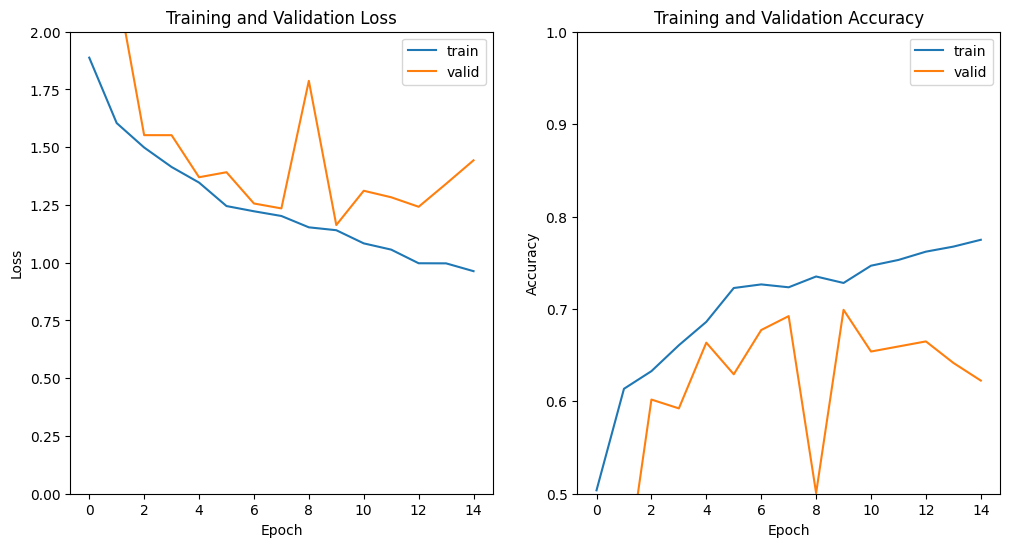

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

In [ ]:
loss, accuracy = net2.evaluate(test_dataset)

12/12 [==============================] - 1s 34ms/step - loss: 1.4017 - accuracy: 0.6102


In [ ]:
errate=0
for images, labels in test_dataset:
    for i in range( images.shape[0]):
        predictions = net2.predict(tf.expand_dims(images[i], 0), verbose=0, steps=1)
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          errate+=1
errate

145

# model 3

In [ ]:


inputs = keras.Input(shape=(224, 224, 3))

x = inputs
x = data_augmentation(x)
x = keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(128,128,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(128,128,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(56,56,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(56,56,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Dense(21, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net3 = keras.Model(inputs, outputs)


from tensorflow.keras.optimizers import Adam

net3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])
net3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      9248      
                                                           

In [ ]:
history3 = net3.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset,
          callbacks=[callback]);

Epoch 1/40
81/81 [==============================] - 29s 260ms/step - loss: 2.4478 - accuracy: 0.1991 - val_loss: 1.8318 - val_accuracy: 0.2982
Epoch 2/40
81/81 [==============================] - 17s 203ms/step - loss: 2.3613 - accuracy: 0.2092 - val_loss: 1.8329 - val_accuracy: 0.2367
Epoch 3/40
81/81 [==============================] - 17s 202ms/step - loss: 2.3277 - accuracy: 0.2182 - val_loss: 1.8330 - val_accuracy: 0.2640
Epoch 4/40
81/81 [==============================] - 17s 204ms/step - loss: 2.3734 - accuracy: 0.2088 - val_loss: 1.8231 - val_accuracy: 0.2722
Epoch 5/40
81/81 [==============================] - 17s 198ms/step - loss: 2.3469 - accuracy: 0.2170 - val_loss: 1.8136 - val_accuracy: 0.2955
Epoch 6/40
81/81 [==============================] - 16s 194ms/step - loss: 2.3294 - accuracy: 0.2092 - val_loss: 1.8097 - val_accuracy: 0.3105
Epoch 7/40
81/81 [==============================] - 16s 196ms/step - loss: 2.2930 - accuracy: 0.2119 - val_loss: 1.8087 - val_accuracy: 0.3133

In [ ]:
loss, accuracy = net3.evaluate(test_dataset)

12/12 [==============================] - 1s 84ms/step - loss: 1.5732 - accuracy: 0.5027


In [ ]:
net3.save('drive/MyDrive/FDL/net3.h5')

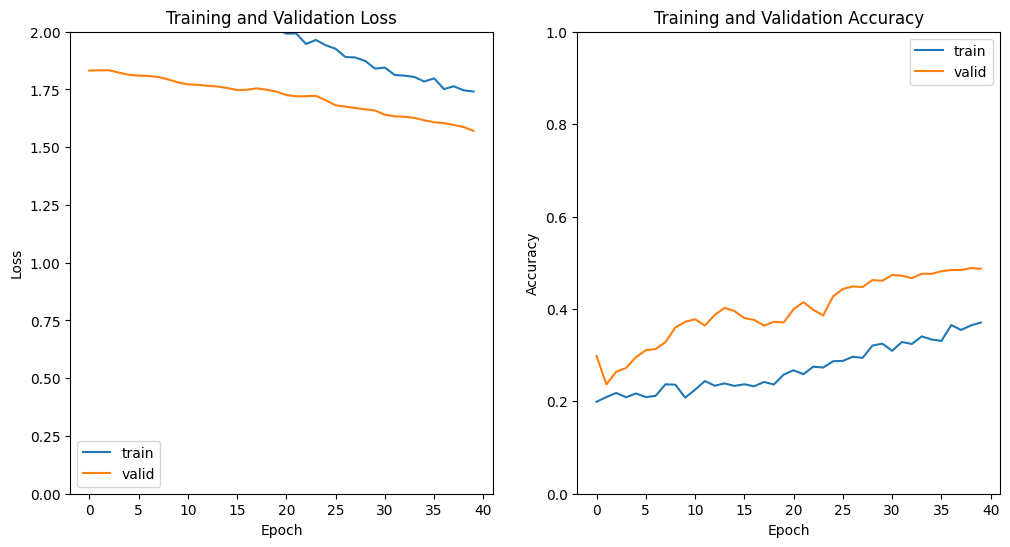

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.ylim([0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

#model 4

In [ ]:

inputs = keras.Input((224,224,3))

x = inputs
x = data_augmentation(x)
x = keras.layers.Conv2D(32, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

block_1_output = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Conv2D(64, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

block_2_output = layers.add([x, block_1_output])

x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(block_2_output)

x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Conv2D(128, 3, padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = keras.layers.Conv2D(64, 3, activation="relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net4 = keras.Model(inputs, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model for training
net4.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Model training (v5)
history4 = net4.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset,
          callbacks=[callback])


Epoch 1/40
81/81 [==============================] - 29s 253ms/step - loss: 1.8894 - accuracy: 0.4718 - val_loss: 2.7379 - val_accuracy: 0.4186
Epoch 2/40
81/81 [==============================] - 16s 193ms/step - loss: 1.5549 - accuracy: 0.6050 - val_loss: 1.6034 - val_accuracy: 0.5554
Epoch 3/40
81/81 [==============================] - 18s 206ms/step - loss: 1.4236 - accuracy: 0.6404 - val_loss: 1.5957 - val_accuracy: 0.5759
Epoch 4/40
81/81 [==============================] - 16s 195ms/step - loss: 1.3459 - accuracy: 0.6560 - val_loss: 1.3448 - val_accuracy: 0.6265
Epoch 5/40
81/81 [==============================] - 16s 193ms/step - loss: 1.2739 - accuracy: 0.6755 - val_loss: 1.4387 - val_accuracy: 0.5882
Epoch 6/40
81/81 [==============================] - 16s 193ms/step - loss: 1.2210 - accuracy: 0.6813 - val_loss: 1.2310 - val_accuracy: 0.6676
Epoch 7/40
81/81 [==============================] - 16s 193ms/step - loss: 1.1659 - accuracy: 0.6821 - val_loss: 1.1088 - val_accuracy: 0.6949

In [ ]:
loss, accuracy = net4.evaluate(test_dataset)

12/12 [==============================] - 2s 116ms/step - loss: 1.3000 - accuracy: 0.6452


In [ ]:
net4.save('drive/MyDrive/FDL/net4.h5')

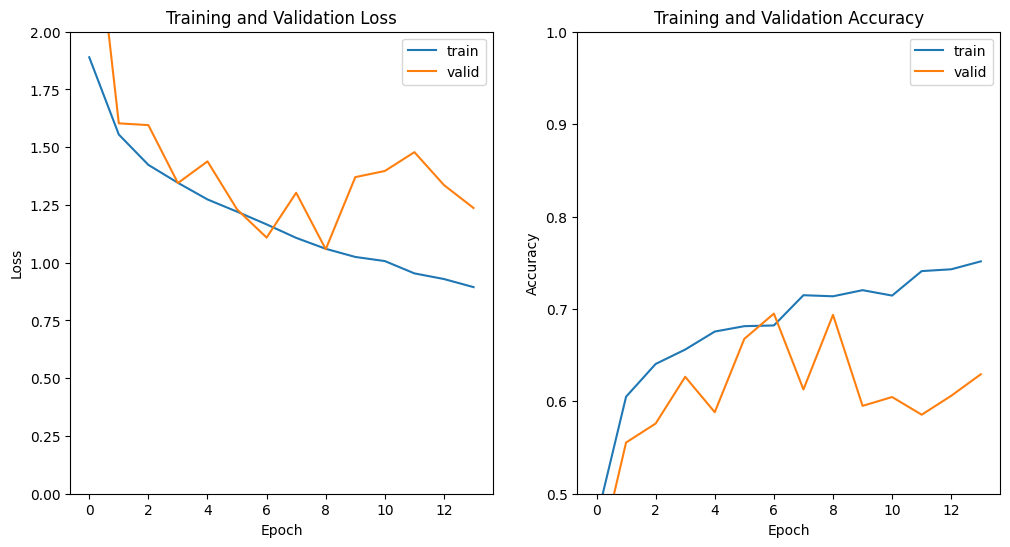

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

# model 5

In [ ]:


inputs = keras.Input(shape=(224, 224, 3))

x = inputs
x = data_augmentation(x)
x = keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(128,128,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(128,128,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

# stochastic pooling as lambda layer
x = keras.layers.Lambda(lambda tensor: tf.math.reduce_mean(tensor, axis=(1, 2), keepdims=True))(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(56,56,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(56,56,3), padding="same", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.Lambda(lambda tensor: tf.math.reduce_mean(tensor, axis=(1, 2), keepdims=True))(x)
x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Dense(21, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.BatchNormalization()(x)

outputs = keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
net5 = keras.Model(inputs, outputs)

# Compile the model for training
from tensorflow.keras.optimizers import Adam
# Compila il modello
net5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
net5.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_29 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 activation_23 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 224, 224, 32)      9248      
                                                           

In [ ]:
history5 = net5.fit(train_dataset,
          epochs=40,
          validation_data=val_dataset,
          callbacks=[callback]);

Epoch 1/40
81/81 [==============================] - 18s 150ms/step - loss: 2.2684 - accuracy: 0.2111 - val_loss: 1.7660 - val_accuracy: 0.2244
Epoch 2/40
81/81 [==============================] - 12s 147ms/step - loss: 2.0627 - accuracy: 0.2150 - val_loss: 1.7600 - val_accuracy: 0.2326
Epoch 3/40
81/81 [==============================] - 12s 148ms/step - loss: 1.9609 - accuracy: 0.2345 - val_loss: 1.7379 - val_accuracy: 0.2640
Epoch 4/40
81/81 [==============================] - 13s 153ms/step - loss: 1.8820 - accuracy: 0.2365 - val_loss: 1.7107 - val_accuracy: 0.3215
Epoch 5/40
81/81 [==============================] - 12s 148ms/step - loss: 1.8116 - accuracy: 0.2571 - val_loss: 1.6682 - val_accuracy: 0.3297
Epoch 6/40
81/81 [==============================] - 12s 147ms/step - loss: 1.7753 - accuracy: 0.2559 - val_loss: 1.6198 - val_accuracy: 0.3639
Epoch 7/40
81/81 [==============================] - 12s 146ms/step - loss: 1.7215 - accuracy: 0.2879 - val_loss: 1.6190 - val_accuracy: 0.3598

In [ ]:
loss, accuracy = net5.evaluate(test_dataset)

12/12 [==============================] - 1s 38ms/step - loss: 1.4727 - accuracy: 0.4328


In [ ]:
net5.save('drive/MyDrive/FDL/net5.h5')

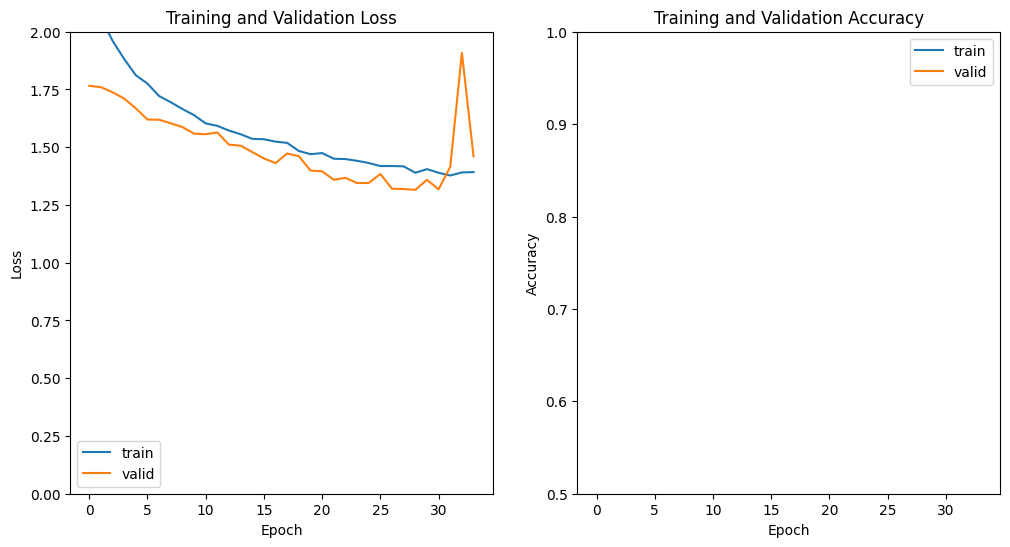

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.ylim([0.0, 2.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');